# Tinanic challenges

In [335]:
import os 
import zipfile

competitions = 'titanic'
if not os.path.isfile(f'./{competitions}.zip'):
    os.system(f'kaggle competitions download -c {competitions}') 

if os.path.isfile(f'./{competitions}.zip'):
    with zipfile.ZipFile(f'./{competitions}.zip', 'r') as zip_ref:
        zip_ref.extractall('./data')

os.remove(f'./{competitions}.zip')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno  #boa prática, coloque sempre no início de seu código.

test_data = pd.read_csv('./data/test.csv')
train_data = pd.read_csv('./data/train.csv')

C:\Users\willi\AppData\Local\Temp\ipykernel_17832\760218660.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [184]:
def trata_dados(df):
    mean_male = df[df['Sex'] == 'male']['Age'].mean()
    mean_female = df[df['Sex'] == 'female']['Age'].mean()
    df.loc[(df['Sex'] == 'male') & pd.isna(df['Age']), 'Age'] = mean_male
    df.loc[(df['Sex'] == 'female') & pd.isna(df['Age']), 'Age'] = mean_female
    df['no_cabin'] = df['Cabin'].isna().astype(int)
    df['Cabin_count'] = df['Cabin'].str.split().str.len().astype('Int64')
    df.loc[pd.isna(df['Cabin_count']), 'Cabin_count'] = 0
    df['Sex_female'] = (df['Sex'] == 'female').astype(int)
    df['Sex_male'] = (df['Sex'] == 'male').astype(int)
    df.loc[pd.isna(df['Fare']), 'Fare'] = df['Fare'].mean()
    df

trata_dados(train_data)
trata_dados(test_data)

<Axes: xlabel='Age', ylabel='Density'>

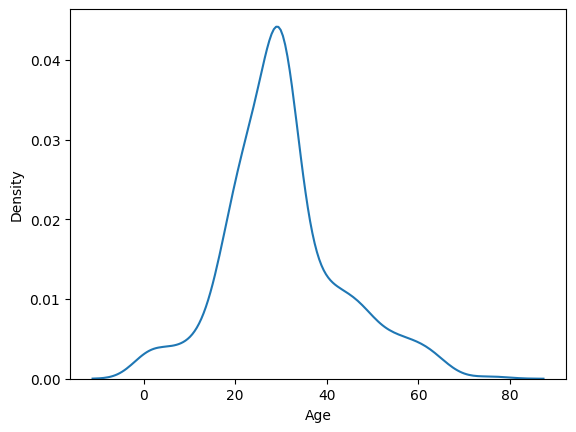

In [8]:
sns.kdeplot(test_data['Age'], legend=True)

In [186]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
no_cabin         0
Cabin_count      0
Sex_bin          0
Sex_female       0
Sex_male         0
dtype: int64

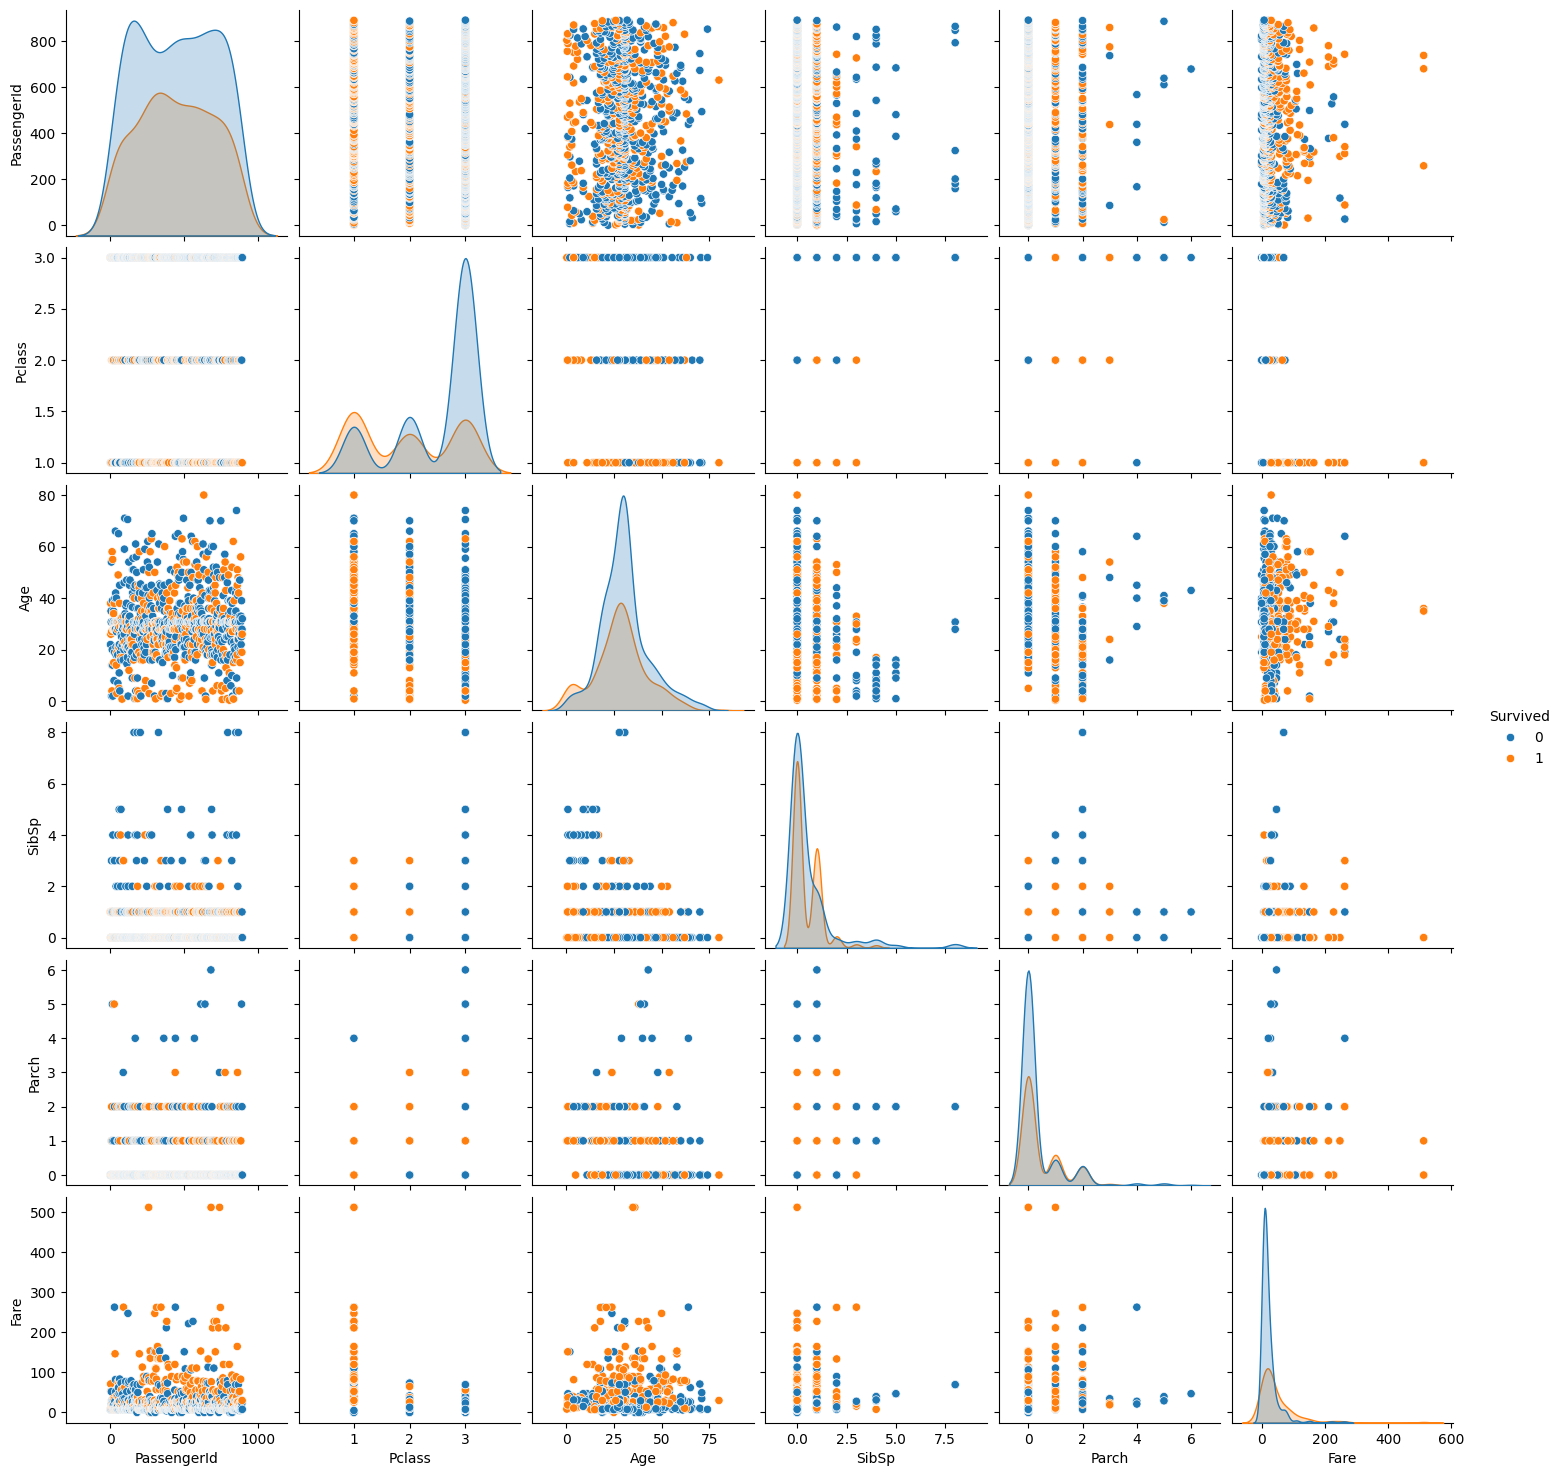

In [10]:
import seaborn as sns

sns.pairplot(data=train_data, hue='Survived')

In [11]:
def show_features_importances(model):
    # Organizing feature names and importances in a DataFrame
    features_df = pd.DataFrame({'features': model.feature_names_in_, 'importances': model.feature_importances_ })

    # Sorting data from highest to lowest
    features_df_sorted = features_df.sort_values(by='importances', ascending=False)

    # Barplot of the result without borders and axis lines
    g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
    sns.despine(bottom = True, left = True)
    g.set_title('Feature importances')
    g.set(xlabel=None)
    g.set(ylabel=None)
    g.set(xticks=[])
    for value in g.containers:
        g.bar_label(value, padding=2)

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = train_data["Survived"]

features = ["Pclass", "Sex_female", "Sex_male", "SibSp", "Fare", "Age", "no_cabin"]
# X = train_data[["Pclass", "Sex_bin", "SibSp", "Fare", "Age", "Embarked_bin"]]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

0.8268156424581006


C:\Users\willi\AppData\Local\Temp\ipykernel_17832\1605094758.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")


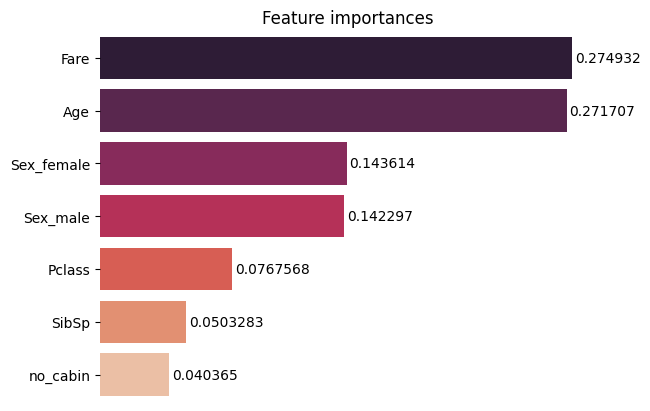

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_rfc = RandomForestClassifier(random_state=5)
model_rfc.fit(X_train, y_train)
prediction_rfc = model_rfc.predict(X_test)

print(accuracy_score(y_test, prediction_rfc))

show_features_importances(model_rfc)

In [162]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_rfc = LogisticRegression()
model_rfc.fit(X_train, y_train)
prediction_rfc = model_rfc.predict(X_test)

print(accuracy_score(y_test, prediction_rfc))

0.8044692737430168


d:\Projetos\Python\Kaggle\titanic_ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
X_train

,Pclass,Sex_female,Sex_male,SibSp,Fare,Age,no_cabin
331,1,0,1,0,28.5000,45.500000,0
733,2,0,1,0,13.0000,23.000000,1
382,3,0,1,0,7.9250,32.000000,1
704,3,0,1,1,7.8542,26.000000,1
813,3,1,0,4,31.2750,6.000000,1
...,...,...,...,...,...,...,...
106,3,1,0,0,7.6500,21.000000,1
270,1,0,1,0,31.0000,30.726645,1
860,3,0,1,2,14.1083,41.000000,1
435,1,1,0,1,120.0000,14.000000,0


In [148]:
train_data.sort_values(by='Age', ascending=False).head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_cabin,Cabin_count,Sex_bin,Sex_female,Sex_male
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,1,1,0,1
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,1,0,1,0,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,1,1,0,1
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,1,0,1,0,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1,0,1,0,1
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,1,0,1,0,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0,1,1,0,1
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,1,0,1,0,1
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,0,1,1,0,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,0,1,1,0,1


In [83]:
X_test['Survived_predict'] = prediction_rfc
X_test['Survived'] = y_test
X_test

,Pclass,SibSp,Fare,Age,no_cabin,Sex_female,Sex_male,Survived_predict,Survived
709,3,1,15.2458,30.726645,True,False,True,0,1
439,2,0,10.5000,31.000000,True,False,True,0,0
840,3,0,7.9250,20.000000,True,False,True,0,0
720,2,0,33.0000,6.000000,True,True,False,1,1
39,3,1,11.2417,14.000000,True,True,False,0,1
...,...,...,...,...,...,...,...,...,...
433,3,0,7.1250,17.000000,True,False,True,0,0
773,3,0,7.2250,30.726645,True,False,True,0,0
25,3,1,31.3875,38.000000,True,True,False,0,1
84,2,0,10.5000,17.000000,True,True,False,1,1


In [25]:
print(f'{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}')

(712, 6) (179, 6) (712,) (179,)


* Create train random forest

In [183]:


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LogisticRegression()
model.fit(X, y)
prediction = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)

# show_features_importances(model)

# print(accuracy_score(y, prediction))

d:\Projetos\Python\Kaggle\titanic_ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
X_test.isnull().sum()

Pclass        0
Sex_female    0
Sex_male      0
SibSp         0
Fare          0
Age           0
no_cabin      0
dtype: int64

In [385]:
def show_features_importances(model):
    # Organizing feature names and importances in a DataFrame
    features_df = pd.DataFrame({'features': model.feature_names_in_, 'importances': model.feature_importances_ })

    # Sorting data from highest to lowest
    features_df_sorted = features_df.sort_values(by='importances', ascending=False)

    # Barplot of the result without borders and axis lines
    g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
    sns.despine(bottom = True, left = True)
    g.set_title('Feature importances')
    g.set(xlabel=None)
    g.set(ylabel=None)
    g.set(xticks=[])
    for value in g.containers:
        g.bar_label(value, padding=2)

* Create train with decicion tre

C:\Users\willi\AppData\Local\Temp\ipykernel_6096\1605094758.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")


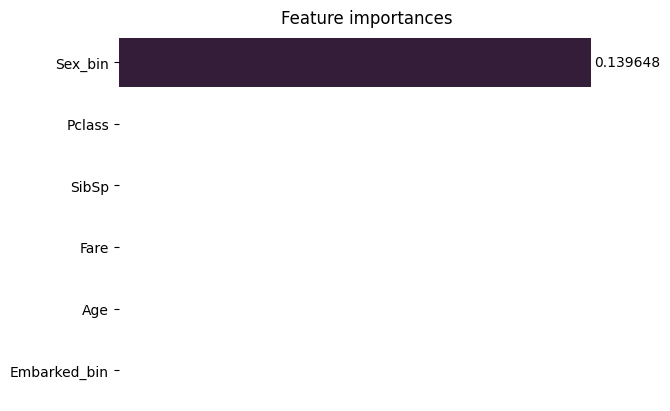

In [387]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X, y)
prediction_tree = model_tree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# cm = confusion_matrix(y_test, prediction)

# print(classification_report(y_test, prediction_tree))

show_features_importances(model_tree)

* Create train with linear regression

In [389]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
# Ajustar o modelo aos dados
model_lr.fit(X, y)
prediction_lr = model_lr.predict(X_test)

show_features_importances(model_lr)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

* Create train with SVC

In [187]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)
predict_svc = model_svc.predict(X_test)

print(classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       106
           1       0.68      0.29      0.40        73

    accuracy                           0.65       179
   macro avg       0.66      0.60      0.58       179
weighted avg       0.66      0.65      0.61       179

